In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/Users/jackcook/Documents/Course notes/Data Sources/2.01. Admittance.csv')

## Inspect data

In [3]:
df.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
df_clean = df.copy()
df_clean['Admitted'] = df_clean.Admitted.map({'Yes':1, 'No':0})
df_clean.describe()

,SAT,Admitted
count,168.000000,168.000000
mean,1695.273810,0.559524
std,183.019017,0.497928
min,1334.000000,0.000000
25%,1547.500000,0.000000
50%,1691.500000,1.000000
75%,1844.500000,1.000000
max,2050.000000,1.000000


## Visualise data

In [5]:
x1 = df_clean.SAT
y = df_clean.Admitted

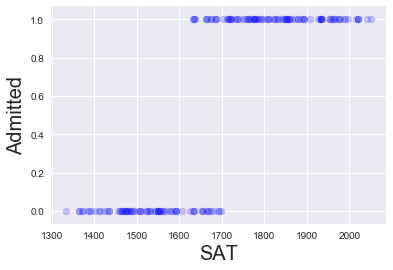

In [6]:
plt.scatter(x1,y,color='b',alpha=0.2)
plt.xlabel(x1.name,fontsize=20)
plt.ylabel(y.name,fontsize=20)
plt.show()

### Regression

In [9]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x) # Logit = logistic
results_log = reg_log.fit() # allows maximum 35 iterations

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2020   Pseudo R-squ.:                  0.7992
Time:                        13:12:14   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**MLE:** Maximum likelihood estimation, how likely it is that the model describes realy relationship of variables (model performance).

**Log-likelihood:** What MLE tries to maximise. Almost always negative

**LL-Null:** the log-likelihood of a model that has no dependent variables (ie. if you fitted y to an array of 1's). Compare to log-likelihood!

**LLR p-value:** Measures whether model is statistically different from LL-null (aka the useless model).

**Pseudo R-squared:** McFadden's R-squared, a good value should be 0.2-0.4, only comparable with similar models!


